In [1]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

[{'N': 3, 'T': range(0, 300), 'M': {'MARKETING_STEADY': 500, 'MARKETING_SHOCK_MAG': 1234, 'MARKETING_SHOCK_FREQ': 2, 'EXO_EXPERIENCE': 140, 'SOURCE_POOL': 10000, 'THRESHOLD': 0.5}}]


In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x000001F894B822B0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000001F894B822B0>]


In [3]:
print(experiments.dataset[0].head())

   timestamp  signal  adoption  run  substep  timestep
0 2020-01-01       0       0.0    1        0         0
2 2020-01-01     500     140.5    1        2         1
4 2020-01-01     500     140.5    1        2         2
6 2020-01-01     500     140.5    1        2         3
8 2020-01-01     500     140.5    1        2         4


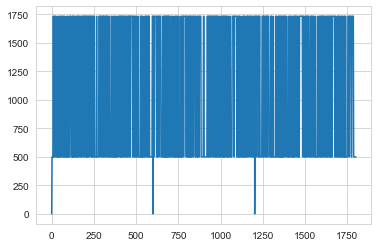

In [4]:
plt.plot(experiments.dataset[0].signal)

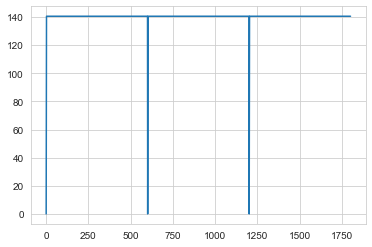

In [5]:
plt.plot(experiments.dataset[0].adoption)